<a href="https://colab.research.google.com/github/ThrishaJawahar/Ford-Car-Resale-Pricing/blob/main/Ford_Car_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from google.colab import files

print("Please upload the ford.csv file")
uploaded = files.upload()

data_path = 'ford.csv'
df = pd.read_csv(data_path)

print("Initial Data Preview:")
print(df.head())

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()

missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

df = df.dropna()

print("\nData After Cleaning:")
print(df.info())



Please upload the ford.csv file


Saving ford.csv to ford.csv
Initial Data Preview:
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0
Number of duplicate rows: 154

Missing Values in Each Column:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null 

Number of Sales for Each Fuel Type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


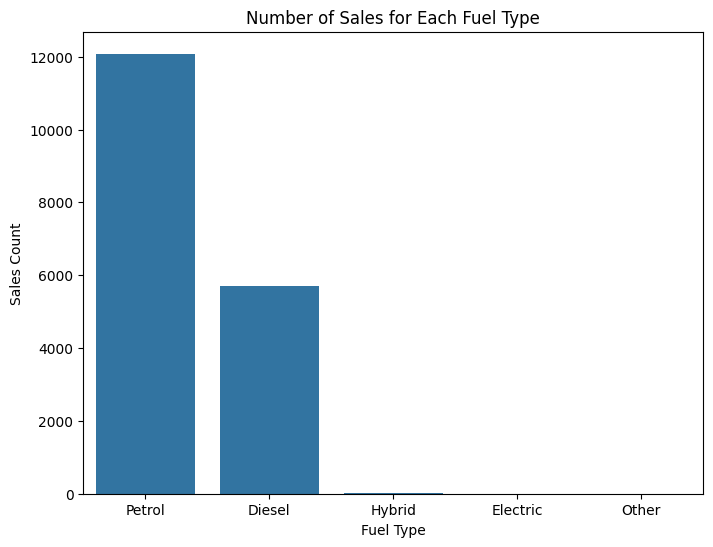

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fuel_type_sales = df['fuelType'].value_counts()
print("Number of Sales for Each Fuel Type:")
print(fuel_type_sales)

plt.figure(figsize=(8,6))
sns.countplot(x='fuelType', data=df)
plt.title('Number of Sales for Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Sales Count')
plt.show()

def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np


X = df[['year', 'mileage']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")


polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = polynomial_features.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")


Linear Regression MSE: 14132197.383164445
Polynomial Regression MSE: 13120956.023832802
Ridge Regression MSE: 14132137.499237735


In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': np.logspace(-6, 6, 13)}

ridge_model = Ridge()

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)


best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_
print(f"Best alpha value: {best_alpha}")
print(f"Best Cross-validated MSE: {best_score}")

best_ridge_model = grid_search.best_estimator_

y_pred_best_ridge = best_ridge_model.predict(X_test)

mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
print(f"Optimized Ridge Regression MSE: {mse_best_ridge}")


Best alpha value: 10.0
Best Cross-validated MSE: 12834023.002219658
Optimized Ridge Regression MSE: 14131599.177671932
